In [1]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv("/Users/Debjani/Documents/Dataset-Table 1.csv")

In [8]:
df.head(3)

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,note1,note2,coverage,pick-up method,date
0,13123,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.770000,3.29,5.29,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
1,13129,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.767737,3.42,5.82,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011
2,13128,2011_1Q,AUS,Australia,..,High income: OECD,..,G20,FJI,Fiji,...,1.750000,4.38,7.38,1.83024,yes,NaN,NaN,Nationwide,Cash,24/Jan/2011


In [9]:
df.shape

(39853, 40)

In [10]:
df.columns


Index([u'id', u'period', u'source_code', u'source_name', u'source_region',
       u'source_income', u'source_lending', u'source_G8G20',
       u'destination_code', u'destination_name', u'destination_region',
       u'destination_income', u'destination_lending', u'destination_G8G20',
       u'firm', u'firm_type', u'product', u'sending location', u'speed actual',
       u'cc1 lcu amount', u'cc1 denomination amount', u'cc1 lcu code',
       u'cc1 lcu fee', u'cc1 lcu fx rate', u'cc1 fx margin',
       u'cc1 total cost %', u'cc2 lcu amount', u'cc2 denomination amount',
       u'cc2 lcu code', u'cc2 lcu fee', u'cc2 lcu fx rate', u'cc2 fx margin',
       u'cc2 total cost %', u'inter lcu bank fx', u'transparent', u'note1',
       u'note2', u'coverage', u'pick-up method', u'date'],
      dtype='object')

In [ ]:

%matplotlib inline
df['Date'] = pd.to_datetime(df['Date'])
ad = df.groupby(df['Date'])['Sale (Dollars)'].sum().to_frame()
ad.plot() 

In [11]:
df1 = df.drop(['id', 'period', 'source_code', 'source_region', 'source_income', 'source_lending',\
              'source_G8G20', 'destination_code', 'destination_region', 'destination_income',\
              'destination_lending', 'destination_G8G20', 'firm', 'sending location', 'speed actual',\
              'cc1 lcu amount', 'cc1 denomination amount', 'cc1 lcu code', 'cc1 lcu fee',\
              'cc1 lcu fx rate', 'cc1 fx margin', 'cc2 lcu amount', 'cc2 denomination amount',\
              'cc2 lcu code', 'cc2 lcu fee', 'cc2 lcu fx rate', 'cc2 fx margin', 'inter lcu bank fx',\
              'transparent', 'note1', 'note2', 'coverage', 'date'], axis = 1)

In [12]:
print df1.head(3)

  source_name destination_name                firm_type       product  \
0   Australia             Fiji  Money Transfer Operator  Cash to cash   
1   Australia             Fiji  Money Transfer Operator  Cash to cash   
2   Australia             Fiji  Money Transfer Operator  Cash to cash   

   cc1 total cost %  cc2 total cost % pick-up method  
0              8.79              5.29           Cash  
1              9.42              5.82           Cash  
2             11.88              7.38           Cash  


In [23]:
df1.shape

(39853, 7)

In [25]:
list(df1.columns)

['source_name',
 'destination_name',
 'firm_type',
 'product',
 'cc1 total cost %',
 'cc2 total cost %',
 'pick-up method']

In [14]:
df1['source_name'].nunique()


32

In [15]:
df1['source_name'].max()

'United States'

Money has been remitted from 32 different nations of which the United States had the maximum number of remittance.

In [16]:
df1['destination_name'].nunique()

93

In [17]:
df1['destination_name'].max()

'Zimbabwe'

Money has been remitted to 93 different nations and maximum number of remittance has occured to Zimbabwe.

In [18]:
df1['firm_type'].nunique()

9

In [19]:
df1['firm_type'].max()

'Post office'

Nine different types of remittance service was used of which the 'Post Office' has been used the maximum number of times

In [22]:
df1['product'].unique()

array(['Cash to cash', 'Online service', 'Account to account',
       'Cash to account', 'Account to account (other bank)',
       'Account to cash', 'Door to door', 'Prepaid card', 'Mobile',
       'USD service', nan, 'Credit/debit card service',
       'Account to account (same bank)', 'Cash to account (same bank)',
       'EUR service', 'JPY service', 'GBP service', 'LCU service',
       'Door to account', 'Account,Cash to cash',
       'Account,Card,Cash to cash',
       'Cash to cash,Credit/debit card service',
       'Cash to account (other bank)', 'Online to cash', 'Bank account',
       'Home delivery', 'Cash,Cash to account', 'Account,Account to cash',
       'Account to account (same bank),Cash',
       'Cash,Cash to account (same bank)', 'Account,Cash to account',
       'Account to account,Cash to cash', 'Cash', 'Bank account,Card',
       'Account to account,Door to door', 'Card,Cash to cash'], dtype=object)

In [20]:
df1['product'].nunique()

35

In [21]:
df1['product'].max()

'USD service'

It can be observed above that USD service product was offered the most.

In [26]:
print df1['pick-up method'].nunique()

print df1['pick-up method'].max()

29
own/partner Bank Account


There were 29 different types of pick-up methods in the distanation country of which owner/partner Bank Account transfer was used the most.

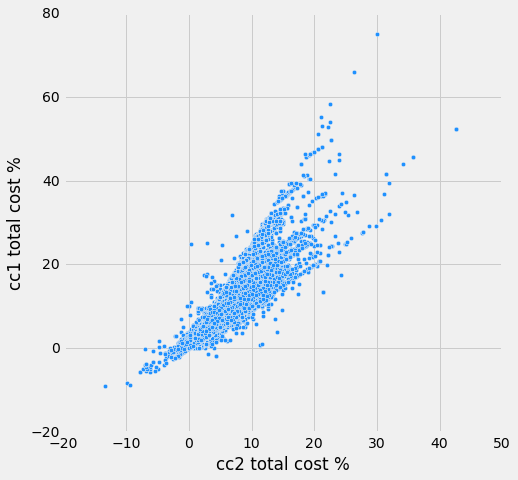

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df1.plot(x='cc2 total cost %', y='cc1 total cost %', kind='scatter', color='dodgerblue', figsize=(7,7))

It can be observed above that when cc2 increases cc1 also increase. There is a linear co-relation between the two variables.

In [66]:
df2 = df.drop(['id', 'period', 'source_code', 'source_region', 'source_income', 'source_lending',\
              'source_G8G20', 'destination_code', 'destination_region', 'destination_income',\
              'destination_lending', 'destination_G8G20', 'firm', 'sending location', 'speed actual',\
              'cc1 lcu amount', 'cc1 denomination amount', 'cc1 lcu code',\
              'cc2 lcu amount', 'cc2 denomination amount',\
              'cc2 lcu code', 'inter lcu bank fx',\
              'transparent', 'note1', 'note2', 'coverage', 'date'], axis = 1)

In [67]:
df2.head()

,source_name,destination_name,firm_type,product,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,pick-up method
0,Australia,Fiji,Money Transfer Operator,Cash to cash,11.0,1.770000,3.29,8.79,10.0,1.770000,3.29,5.29,Cash
1,Australia,Fiji,Money Transfer Operator,Cash to cash,12.0,1.767737,3.42,9.42,12.0,1.767737,3.42,5.82,Cash
2,Australia,Fiji,Money Transfer Operator,Cash to cash,15.0,1.750000,4.38,11.88,15.0,1.750000,4.38,7.38,Cash
3,Australia,Fiji,Bank,Online service,20.0,1.791400,2.12,12.12,20.0,1.791400,2.12,6.12,Bank Account
4,Australia,Fiji,Bank,Online service,20.0,1.764200,3.61,13.61,20.0,1.764200,3.61,7.61,Bank Account


In [68]:
list(df2.columns)

['source_name',
 'destination_name',
 'firm_type',
 'product',
 'cc1 lcu fee',
 'cc1 lcu fx rate',
 'cc1 fx margin',
 'cc1 total cost %',
 'cc2 lcu fee',
 'cc2 lcu fx rate',
 'cc2 fx margin',
 'cc2 total cost %',
 'pick-up method']

In [69]:
df2['total_fee'] = df2['cc1 lcu fee'] + df2['cc2 lcu fee']

In [45]:
#df2['total_cost']= df2['cc1 total cost %'] + df2['cc2 total cost %']

In [70]:
df2['total_rate'] = df2['cc1 lcu fx rate'] + df2['cc2 lcu fx rate']

In [71]:
df2['total_margin'] = df2['cc1 fx margin'] + df2['cc2 fx margin']

In [73]:
df2['total_cost']= df2['cc1 total cost %'] + df2['cc2 total cost %']

In [74]:
df2.head()

,source_name,destination_name,firm_type,product,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,pick-up method,total_fee,total_rate,total_margin,total_cost
0,Australia,Fiji,Money Transfer Operator,Cash to cash,11.0,1.770000,3.29,8.79,10.0,1.770000,3.29,5.29,Cash,21.0,3.540000,6.58,14.08
1,Australia,Fiji,Money Transfer Operator,Cash to cash,12.0,1.767737,3.42,9.42,12.0,1.767737,3.42,5.82,Cash,24.0,3.535474,6.84,15.24
2,Australia,Fiji,Money Transfer Operator,Cash to cash,15.0,1.750000,4.38,11.88,15.0,1.750000,4.38,7.38,Cash,30.0,3.500000,8.76,19.26
3,Australia,Fiji,Bank,Online service,20.0,1.791400,2.12,12.12,20.0,1.791400,2.12,6.12,Bank Account,40.0,3.582800,4.24,18.24
4,Australia,Fiji,Bank,Online service,20.0,1.764200,3.61,13.61,20.0,1.764200,3.61,7.61,Bank Account,40.0,3.528400,7.22,21.22


In [49]:
list(df2.columns)

['source_name',
 'destination_name',
 'firm_type',
 'product',
 'cc1 lcu fee',
 'cc1 lcu fx rate',
 'cc1 fx margin',
 'cc1 total cost %',
 'cc2 lcu fee',
 'cc2 lcu fx rate',
 'cc2 fx margin',
 'cc2 total cost %',
 'pick-up method',
 'total_cost',
 'total_fee',
 'total_rate',
 'total_margin']

In [75]:
df3= df2.drop(['cc1 lcu fee', 'cc2 lcu fee', 'cc1 lcu fx rate', 'cc2 lcu fx rate',\
               'cc1 fx margin', 'cc2 fx margin', 'cc1 total cost %', 'cc2 total cost %' ], axis = 1)

In [82]:
df3 = df3.reset_index(drop=True)


In [83]:
df3.head(3)

,source_name,destination_name,firm_type,product,pick-up method,total_fee,total_rate,total_margin,total_cost
0,0,25,4,19,9,21.0,3.540000,6.58,14.08
1,0,25,4,19,9,24.0,3.535474,6.84,15.24
2,0,25,4,19,9,30.0,3.500000,8.76,19.26


In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39853 entries, 0 to 39852
Data columns (total 9 columns):
source_name         39853 non-null object
destination_name    39853 non-null object
firm_type           39853 non-null object
product             39639 non-null object
pick-up method      30465 non-null object
total_fee           39730 non-null float64
total_rate          39644 non-null float64
total_margin        39751 non-null float64
total_cost          39751 non-null float64
dtypes: float64(4), object(5)
memory usage: 2.7+ MB


In [84]:
#lets convert all the object types into numerical data type

from sklearn.preprocessing import LabelEncoder

categoricals = ['source_name','destination_name', 'firm_type', 'product', 'pick-up method']
df3[categoricals] = df3[categoricals].apply(LabelEncoder().fit_transform)
df3.head(3)

,source_name,destination_name,firm_type,product,pick-up method,total_fee,total_rate,total_margin,total_cost
0,0,25,4,19,9,21.0,3.540000,6.58,14.08
1,0,25,4,19,9,24.0,3.535474,6.84,15.24
2,0,25,4,19,9,30.0,3.500000,8.76,19.26


In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39853 entries, 0 to 39852
Data columns (total 9 columns):
source_name         39853 non-null int64
destination_name    39853 non-null int64
firm_type           39853 non-null int64
product             39853 non-null int64
pick-up method      39853 non-null int64
total_fee           39730 non-null float64
total_rate          39644 non-null float64
total_margin        39751 non-null float64
total_cost          39751 non-null float64
dtypes: float64(4), int64(5)
memory usage: 2.7 MB


In this analysis, I would like to you 'total_cost' as the target variable which is a continuous. The independent variables are categorical as well as continuous variables. Hence we could use linear regression for analysis and decision tree for regresion analysis.

Linear regression can be used for making predictions. 


In [80]:
from sklearn.tree import DecisionTreeRegressor,  export_graphviz
from sklearn.cross_validation import KFold, cross_val_score,cross_val_predict
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error

In [90]:
df3 = df3.dropna()
df3 = df3.reset_index(drop=True)

In [91]:
y = df3['total_cost']
cols = df3.columns
X = df3[cols[1:9]]
X.head()

,destination_name,firm_type,product,pick-up method,total_fee,total_rate,total_margin,total_cost
0,25,4,19,9,21.0,3.540000,6.58,14.08
1,25,4,19,9,24.0,3.535474,6.84,15.24
2,25,4,19,9,30.0,3.500000,8.76,19.26
3,25,0,32,5,40.0,3.582800,4.24,18.24
4,25,0,32,5,40.0,3.528400,7.22,21.22


In [92]:
# Estimate a decision tree regressor
features=['source_name','destination_name','firm_type','product','pick-up method','total_fee','total_rate','total_margin']
dt_init = DecisionTreeRegressor()
dt_init.fit(X,y)
y_predict = cross_val_predict(dt_init,X,y)
score = cross_val_score(dt_init,X,y)
print "cross_val_score:"
print score.mean()        
print "MSE:"
print mean_squared_error(y,y_predict)
print "Variance:"
print (mean_squared_error(y,y_predict))/(1-score.mean())

cross_val_score:
0.999415943965
MSE:
0.0665972787722
Variance:
114.025495426


In [93]:
# Grid search over various tree depths
dt_init = DecisionTreeRegressor()
gs1 = GridSearchCV(dt_init,{'max_depth':range(2,9)})
gs1.fit(X,y)
y_predict = cross_val_predict(gs1.best_estimator_,X,y)
score = cross_val_score(gs1.best_estimator_,X,y)
print gs1.best_estimator_
print "cross_val_score:"
print score.mean()        
print "MSE:"
print mean_squared_error(y,y_predict)
print "Variance:"
print (mean_squared_error(y,y_predict))/(1-score.mean())

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
cross_val_score:
0.999560859986
MSE:
0.0603897400638
Variance:
137.518190407


In [95]:
# Function to plot feature importances
def print_features(model,X,y,features):
    features = pd.Series(features)
    model.fit(X, y)
#     importances = model.feature_importances_
    try:
        importances = np.mean([tree.feature_importances_ for tree in model.estimators_],axis=0)
        std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
    except:
        importances = model.feature_importances_
        std = 0
        
    indices = np.argsort(importances)[::-1]
    print indices

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(indices.size):#(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    try:
        plt.bar(range(indices.size), importances[indices],
               color="r", yerr=std[indices], align="center")
    except:
        plt.bar(range(indices.size), importances[indices],
           color="r", yerr=std, align="center")
    plt.xticks(range(indices.size), features[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

[7 5 4 6 3 2 1 0]
Feature ranking:
1. feature 7 (0.999995)
2. feature 5 (0.000004)
3. feature 4 (0.000000)
4. feature 6 (0.000000)
5. feature 3 (0.000000)
6. feature 2 (0.000000)
7. feature 1 (0.000000)
8. feature 0 (0.000000)


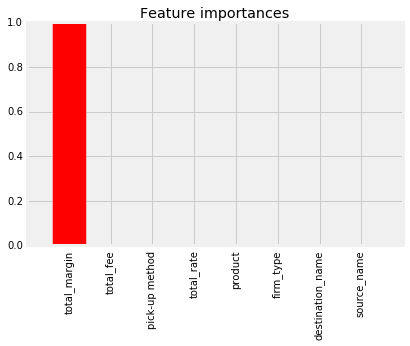

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print_features(gs1.best_estimator_,X,y,features)

The above model doesnot have much predictive capacity. The variance is very high and the feature importance plot is not much conclusive. Lets try linear regression 

In [113]:
#Linear regression
from sklearn import linear_model
lm = linear_model.LinearRegression()
y = df3['total_cost']
cols = df3.columns
X = df3[cols[1:9]]
model = lm.fit(X, y)

In [114]:
predictions = lm.predict(X)

print "coefficients of the model", lm.coef_
print "intercept of the model", lm.intercept_

coefficients of the model [  2.51625873e-18  -2.94862309e-15  -2.14902050e-16   7.35351325e-17
   3.31089409e-19   1.18427341e-17   1.60336107e-15   1.00000000e+00]
intercept of the model 1.06581410364e-14


In [115]:
from sklearn.metrics import r2_score
y_true = y
y_pred = model.predict(X)

lr_r2 =  r2_score(y_true=y_true, y_pred=y_pred)
print "The r2 value for the model: ", lr_r2

The r2 value for the model:  1.0


In [126]:
print "MSE:", mean_squared_error(y, y_pred)

MSE: 2.51529256162e-27


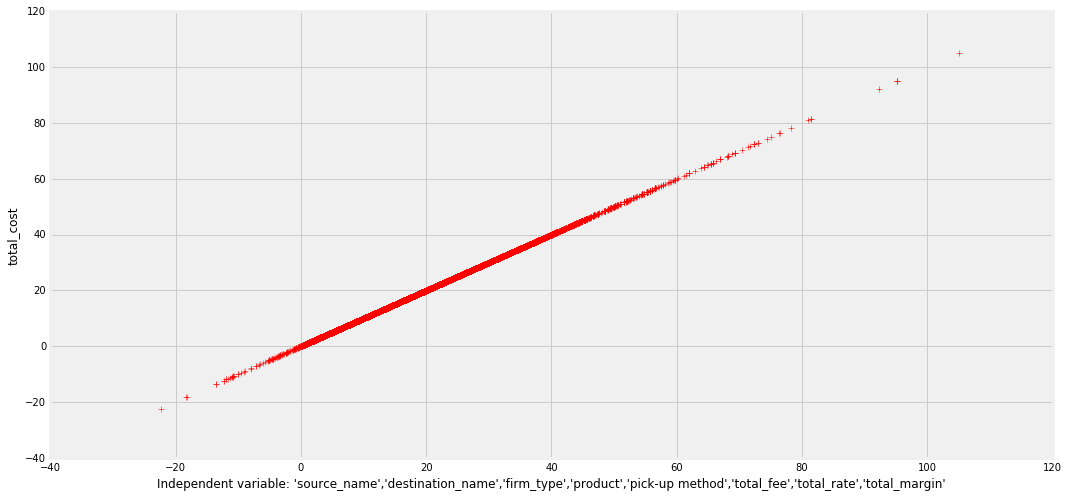

In [125]:
# Plot the model
plt.figure(figsize=(16,8))
plt.scatter(y_pred, y, s=30, c='r', marker='+', zorder=1)
plt.xlabel("Independent variable: 'source_name','destination_name',\
'firm_type','product','pick-up method','total_fee','total_rate','total_margin'")
plt.ylabel("total_cost")
plt.show()

In [119]:
Summary of the Project:
